In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Loading the Dataset from Kaggle**

Dataset contains a total of 2500 audio files of males and females, choose any 15 words out of available corpus for each of the speaker. 

In [2]:
!kaggle datasets download -d hazrat/urdu-speech-dataset

urdu-speech-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip *.zip

Archive:  urdu-speech-dataset.zip
replace files/AAMNG1/AAMNG1001.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: files/AAMNG1/AAMNG1001.wav  
  inflating: files/AAMNG1/AAMNG1002.wav  
  inflating: files/AAMNG1/AAMNG1003.wav  
  inflating: files/AAMNG1/AAMNG1004.wav  
  inflating: files/AAMNG1/AAMNG1005.wav  
  inflating: files/AAMNG1/AAMNG1006.wav  
  inflating: files/AAMNG1/AAMNG1007.wav  
  inflating: files/AAMNG1/AAMNG1008.wav  
  inflating: files/AAMNG1/AAMNG1009.wav  
  inflating: files/AAMNG1/AAMNG1010.wav  
  inflating: files/AAMNG1/AAMNG1011.wav  
  inflating: files/AAMNG1/AAMNG1012.wav  
  inflating: files/AAMNG1/AAMNG1013.wav  
  inflating: files/AAMNG1/AAMNG1014.wav  
  inflating: files/AAMNG1/AAMNG1015.wav  
  inflating: files/AAMNG1/AAMNG1016.wav  
  inflating: files/AAMNG1/AAMNG1017.wav  
  inflating: files/AAMNG1/AAMNG1018.wav  
  inflating: files/AAMNG1/AAMNG1019.wav  
  inflating: files/AAMNG1/AAMNG1020.wav  
  inflating: files/AAMNG1/AAMNG1021.wav  
  inflat

**Word Selection**

A corpus of the 15 words chosen will be made for further process.

*Note - Words are chosen at random*

Using Librosa to Identify the words from the recorded audio

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

1. Index = xx83

**'ش' = Shah (King)**


In [5]:
Audio(data = r'files/AKMNG2/AKMNG2083.wav')

2. Index = xx84

**'سو' = So (Sleep)**

In [6]:
Audio(data = r'files/AKMNG2/AKMNG2084.wav')

3. Index = xx85

**'خود' = Khud (Myself)**

In [7]:
Audio(data = r'files/AKMNG2/AKMNG2085.wav')

4. Index = xx98

**'تعلیم' = Taleem (Education)**

In [8]:
Audio(data = r'files/AKMNG2/AKMNG2098.wav')

5. Index = x113

**'پا رٹی' =  (Party)**

In [9]:
Audio(data = r'files/AKMNG2/AKMNG2113.wav')

6. Index = x110

**'ادا' = Ada (Pay)**

In [10]:
Audio(data = r'files/AKMNG2/AKMNG2110.wav')

7. Index = x146

**'گرفتار' = Giraftar (Arrest)**

In [11]:
Audio(data = r'files/AKMNG2/AKMNG2146.wav')

8. Index = x178

**'پیداوار' = Paidawar (Production)**

In [12]:
Audio(data = r'files/AKMNG2/AKMNG2178.wav')

9. Index = x189

**'موجودہ' = Maujuda (Current)**

In [13]:
Audio(data = r'files/AKMNG2/AKMNG2189.wav')

10. Index = x193

**'سخت' = Sakth (Tough)**

In [14]:
Audio(data = r'files/AKMNG2/AKMNG2193.wav')

11. Index = x248

**'صفحہ' = Sifaha (Page)**

In [15]:
Audio(data = r'files/AKMNG2/AKMNG2248.wav')

12. Index = x123

**'بھارت' = Bharat (India)**

In [16]:
Audio(data = r'files/AKMNG2/AKMNG2123.wav')

13. Index = x137

**'تکنیکی' = Taqneeki (Technical)**

In [17]:
Audio(data = r'files/AKMNG2/AKMNG2137.wav')

14. Index = x144

**'خصوصی'= Khasoosi (Special)**



In [18]:
Audio(data = r'files/AKMNG2/AKMNG2144.wav')

15. Index = x149

**'اختیار' = Aftiyar (Option)**

In [19]:
Audio(data = r'files/AKMNG2/AKMNG2149.wav')

In [20]:
corpus=['083','084','085','098','113','110','146','178','189','193','248','123','137','144','149']

word_Eng=['Shah(King)','So(Sleep)','Khud(Myself)','Taleem(Education)','Party','Ada(Pay)','Giraftar(Arrest)','Paidawar(Production)',
              'Maujuda(Current)','Sakth(Tough)','Sifaha(Page)','Bharat(India)','Taqneeki(Technical)','Khasoosi(Special)','Aftiyar(Option)']

word_Urdu=[
'ش'
'سو',
'خود',
'تعلیم',
'پا رٹی',
'ادا',
'گرفتار',
'پیداوار',
'موجودہ',
'سخت',
'صفحہ',
'بھارت',
'تکنیکی',
'خصوصی',
'اختیار'
]

**Creating a file list for Training data**

10 individuals will comprise of the training set

In [21]:
file_list=[]

for i in corpus:
  file_list.append('files/AAMNG1/AAMNG1'+str(i)+".wav")
  file_list.append('files/ABMNG1/ABMNG1'+str(i)+".wav")
  file_list.append('files/AEFYG1/AEFYG1'+str(i)+".wav")
  file_list.append('files/AFFYG1/AFFYG1'+str(i)+".wav")
  file_list.append('files/AGMNG1/AGMNG1'+str(i)+".wav")
  file_list.append('files/AHMNG1/AHMNG1'+str(i)+".wav")
  file_list.append('files/ACMNG2/ACMNG2'+str(i)+".wav")
  file_list.append('files/AIMYG2/AIMYG2'+str(i)+".wav")
  file_list.append('files/AJMNG2/AJMNG2'+str(i)+".wav")
  file_list.append('files/AKMNG2/AKMNG2'+str(i)+".wav")

In [22]:
print("The following is the list of files used :\n",file_list)

The following is the list of files used :
 ['files/AAMNG1/AAMNG1083.wav', 'files/ABMNG1/ABMNG1083.wav', 'files/AEFYG1/AEFYG1083.wav', 'files/AFFYG1/AFFYG1083.wav', 'files/AGMNG1/AGMNG1083.wav', 'files/AHMNG1/AHMNG1083.wav', 'files/ACMNG2/ACMNG2083.wav', 'files/AIMYG2/AIMYG2083.wav', 'files/AJMNG2/AJMNG2083.wav', 'files/AKMNG2/AKMNG2083.wav', 'files/AAMNG1/AAMNG1084.wav', 'files/ABMNG1/ABMNG1084.wav', 'files/AEFYG1/AEFYG1084.wav', 'files/AFFYG1/AFFYG1084.wav', 'files/AGMNG1/AGMNG1084.wav', 'files/AHMNG1/AHMNG1084.wav', 'files/ACMNG2/ACMNG2084.wav', 'files/AIMYG2/AIMYG2084.wav', 'files/AJMNG2/AJMNG2084.wav', 'files/AKMNG2/AKMNG2084.wav', 'files/AAMNG1/AAMNG1085.wav', 'files/ABMNG1/ABMNG1085.wav', 'files/AEFYG1/AEFYG1085.wav', 'files/AFFYG1/AFFYG1085.wav', 'files/AGMNG1/AGMNG1085.wav', 'files/AHMNG1/AHMNG1085.wav', 'files/ACMNG2/ACMNG2085.wav', 'files/AIMYG2/AIMYG2085.wav', 'files/AJMNG2/AJMNG2085.wav', 'files/AKMNG2/AKMNG2085.wav', 'files/AAMNG1/AAMNG1098.wav', 'files/ABMNG1/ABMNG1098.wa

In [23]:
c_m=[]
w_e=[]
w_u=[]

for j in corpus:
  for i in range(11):
    c_m.append(j)
for j in word_Eng:
  for i in range(11):
    w_e.append(j)
for j in word_Urdu:
  for i in range(11):
    w_u.append(j)
print(c_m,w_e,w_u)

['083', '083', '083', '083', '083', '083', '083', '083', '083', '083', '083', '084', '084', '084', '084', '084', '084', '084', '084', '084', '084', '084', '085', '085', '085', '085', '085', '085', '085', '085', '085', '085', '085', '098', '098', '098', '098', '098', '098', '098', '098', '098', '098', '098', '113', '113', '113', '113', '113', '113', '113', '113', '113', '113', '113', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '146', '146', '146', '146', '146', '146', '146', '146', '146', '146', '146', '178', '178', '178', '178', '178', '178', '178', '178', '178', '178', '178', '189', '189', '189', '189', '189', '189', '189', '189', '189', '189', '189', '193', '193', '193', '193', '193', '193', '193', '193', '193', '193', '193', '248', '248', '248', '248', '248', '248', '248', '248', '248', '248', '248', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '123', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137'

In [24]:
dataframe=pd.DataFrame(list(zip(c_m,w_e,w_u,file_list)),columns=['Corpus','English','Urdu','Path'])

In [25]:
print(dataframe)

    Corpus            English    Urdu                        Path
0      083         Shah(King)     شسو  files/AAMNG1/AAMNG1083.wav
1      083         Shah(King)     شسو  files/ABMNG1/ABMNG1083.wav
2      083         Shah(King)     شسو  files/AEFYG1/AEFYG1083.wav
3      083         Shah(King)     شسو  files/AFFYG1/AFFYG1083.wav
4      083         Shah(King)     شسو  files/AGMNG1/AGMNG1083.wav
..     ...                ...     ...                         ...
145    144  Khasoosi(Special)  اختیار  files/AHMNG1/AHMNG1149.wav
146    144  Khasoosi(Special)  اختیار  files/ACMNG2/ACMNG2149.wav
147    144  Khasoosi(Special)  اختیار  files/AIMYG2/AIMYG2149.wav
148    144  Khasoosi(Special)  اختیار  files/AJMNG2/AJMNG2149.wav
149    144  Khasoosi(Special)  اختیار  files/AKMNG2/AKMNG2149.wav

[150 rows x 4 columns]


**Mel-Frequency Cepstral Coefficients**

In [26]:
import os
import librosa
import librosa.display

In [27]:
def mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [28]:
X_df = pd.DataFrame(dataframe['Path'].apply(lambda x: mfcc_features(x)).tolist())
X_df.head()

0           1          2          3          4          5    \
0 -190.285599  115.414238 -73.824425  42.810970 -18.328188  15.614243   
1 -283.435944  100.056061 -32.974815  48.266022  -4.873994  14.561666   
2 -254.483109   62.016846 -71.581734  70.173355 -38.037563  25.705383   
3 -245.086609  126.808144 -61.511971  41.460918   0.529521   8.759551   
4 -241.315170  137.851105 -44.055149  42.827282  -5.402484  14.527572   

         6          7          8          9    ...       118       119  \
0 -12.945983   5.768264 -24.008570  13.617596  ... -0.663516 -1.648517   
1   1.368805   5.862929 -14.666618  12.883349  ... -0.341219 -1.243228   
2 -13.204325   4.386250  -6.425518   3.962559  ...  0.778785  0.223085   
3 -11.796894   6.256975  -9.049469  -6.116999  ...  1.436782  0.520769   
4 -10.240479  19.817354 -23.296953   8.553469  ... -0.986905 -0.165167   

        120       121       122       123       124       125       126  \
0 -2.646644 -1.791165 -0.655998  0.583726 -1.195845 -0.883383 -0.111810   
1 -0.509305 -0.509963  0.089645 -1.575203 -0.619544 -0.350850 -1.930994   
2 -0.244311  0.333641 -0.455979  0.132313  0.523683  0.024538  0.107914   
3 -0.493017  0.555119  1.337889  1.284299 -0.270879 -0.472307 -0.160252   
4 -0.118091  0.316110 -0.016335  1.234172  0.713547 -0.717300 -0.799586   

        127  
0 -0.277586  
1  0.002305  
2 -0.751522  
3  0.141812  
4 -0.195936  

[5 rows x 128 columns]

**We can check the correlation between the MFCC features**

Plotting a correlation heatmap

In [29]:
corr = X_df.corr()
corr.style.background_gradient(cmap = "BrBG")

**As we can see there is no observable pattern of correlation**

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(dataframe['Corpus'])
y = encoder.transform(dataframe['Corpus'])

**Creating a dataframe for post processing**

In [31]:
dataframe_processed=pd.concat([pd.DataFrame(X_df), pd.DataFrame(y)], axis=1)

**Checking for any Null Values**

In [32]:
dataframe_processed.isna().sum().sum()

0

In [33]:
X_df=dataframe_processed.iloc[:,:-1]

In [34]:
y=dataframe_processed.iloc[:,-1:]

**Splitting into Training and Validation**

80-20 Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, stratify=y)

In [37]:
X_train.shape,X_test.shape

((120, 128), (30, 128))

In [38]:
y_train.shape,y_test.shape

((120, 1), (30, 1))

**Model Building**



1.   Logistic Regression
2.   SVC - RBF
3.   MLP Classifier
4.   1D CNN



**1. Logistic Regression**

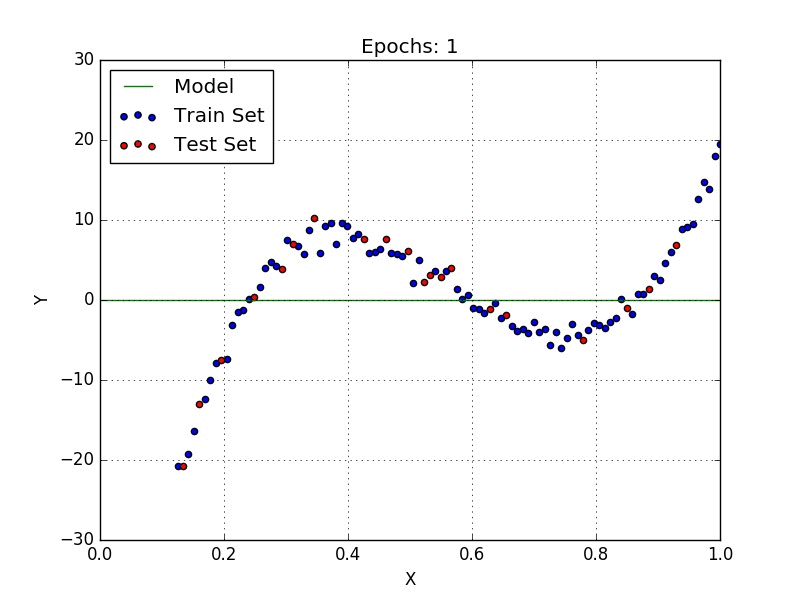

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

In [40]:
logit = LogisticRegression(C=0.0001)
logit.fit(X_train, y_train)
logit_prediction=logit.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
print("The Accuracy of Logistic Regression Model is :",accuracy_score(logit_prediction,y_test))

The Accuracy of Logistic Regression Model is : 0.3333333333333333


In [42]:
print(classification_report(logit_prediction,y_test,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         2
           2       0.33      1.00      0.50         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         0
           9       0.50      0.17      0.25         6
          10       0.00      0.00      0.00         6
          11       0.50      0.50      0.50         2
          12       0.50      0.50      0.50         2
          13       0.00      0.00      0.00         0

    accuracy                           0.33        30
   macro avg       0.35      0.33      0.32        30
weighted avg       0.44      0.33      0.36        30



Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f2256464cd0>


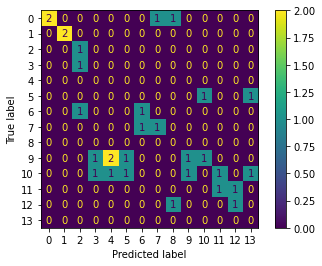

In [43]:
print('Confusion Matrix:',metrics.ConfusionMatrixDisplay.from_predictions(logit_prediction,y_test))

Normalized Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f2255a35250>


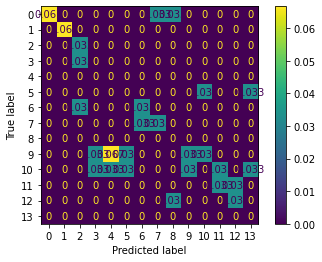

In [44]:
print('Normalized Confusion Matrix:',metrics.ConfusionMatrixDisplay.from_predictions(logit_prediction,y_test,normalize='all'))

**2. Support Vector Classifier - Radial Basis Function**

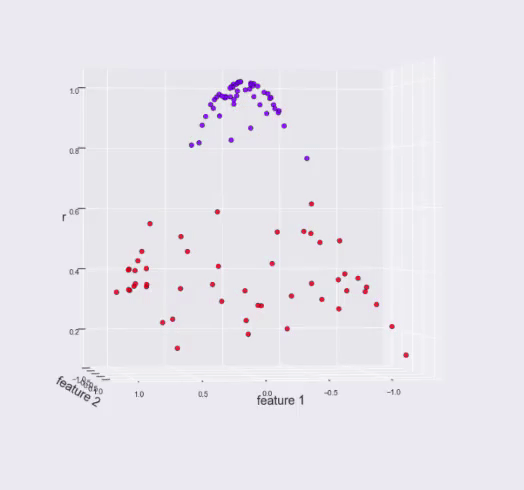

In [45]:
from sklearn import svm

In [46]:
rbf_svc = svm.SVC(kernel = 'rbf')

In [47]:
rbf_svc.fit(X_train, y_train)
svc_prediction=rbf_svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print("The Accuracy of SVC RBF Model is :",accuracy_score(svc_prediction,y_test))

The Accuracy of SVC RBF Model is : 0.26666666666666666


In [49]:
print(classification_report(svc_prediction,y_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         0
           9       0.50      0.14      0.22         7
          10       0.00      0.00      0.00         7
          11       0.50      0.50      0.50         2
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         2

    accuracy                           0.27        30
   macro avg       0.29      0.27      0.26        30
weighted avg       0.37      0.27      0.29        30



Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f225591af50>


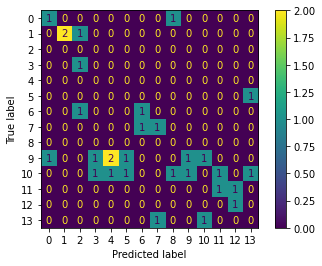

In [50]:
print('Confusion Matrix:',metrics.ConfusionMatrixDisplay.from_predictions(svc_prediction,y_test))

Normalized Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f2255849ad0>


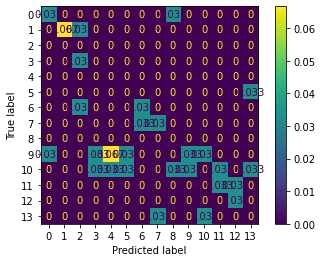

In [51]:
print('Normalized Confusion Matrix:',metrics.ConfusionMatrixDisplay.from_predictions(svc_prediction,y_test,normalize='all'))

**3. MLP Classifier**

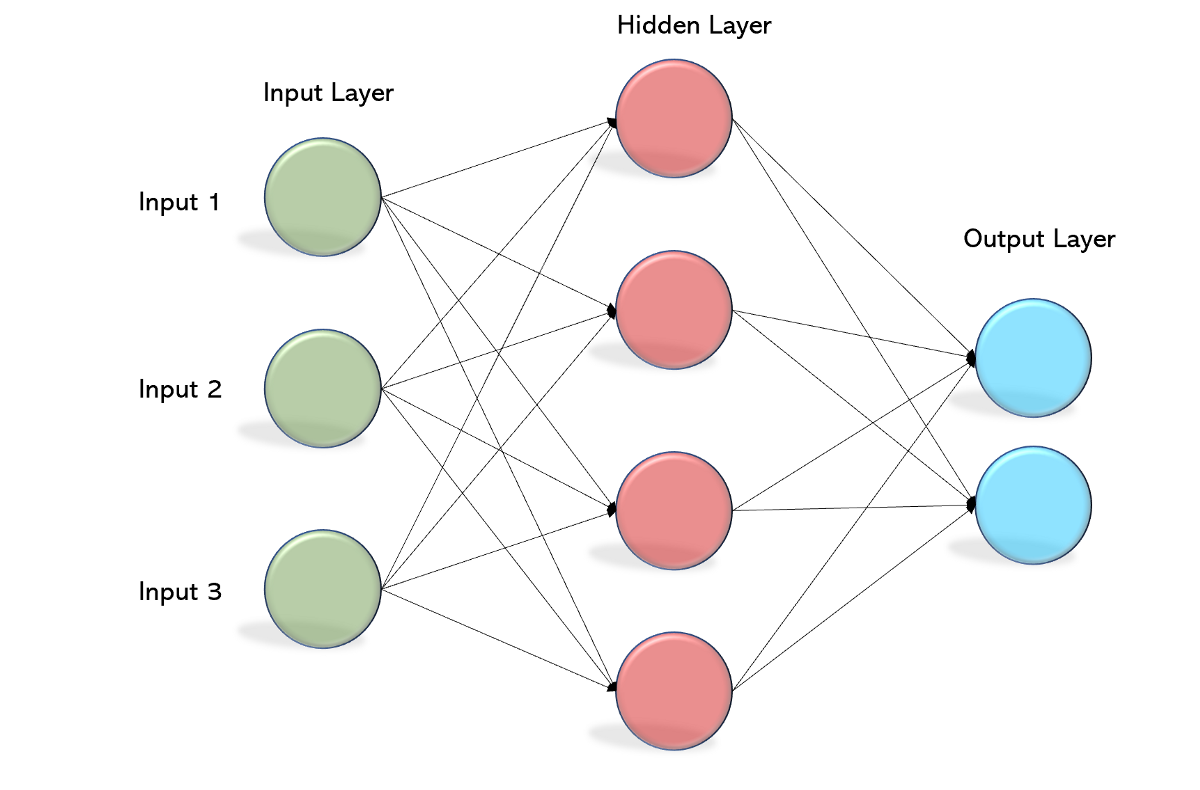

In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
mlp = MLPClassifier()

In [54]:
mlp.fit(X_train, y_train)
mlp_prediction=mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [55]:
print("The Accuracy of MLP Classifier is :",accuracy_score(mlp_prediction,y_test))

The Accuracy of MLP Classifier is : 0.1


In [56]:
print(classification_report(mlp_prediction,y_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.50      0.33      0.40         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1

    accuracy                           0.10        30
   macro avg       0.10      0.07      0.08        30
weighted avg       0.14      0.10      0.12        30



Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f2255698890>


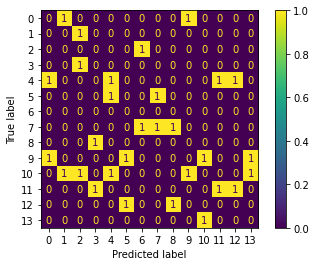

In [57]:
print('Confusion Matrix:',metrics.ConfusionMatrixDisplay.from_predictions(mlp_prediction,y_test))

Normalized Confusion Matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f22554cce50>


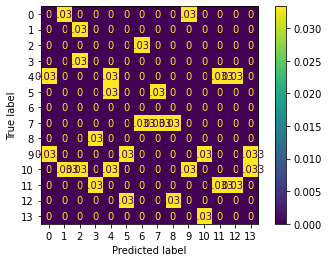

In [58]:
print('Normalized Confusion Matrix:',metrics.ConfusionMatrixDisplay.from_predictions(mlp_prediction,y_test,normalize='all'))

**4. 1D CNN**

In [59]:
X_train_1d = X_train.values.reshape(-1,128,1)
X_test_1d = X_test.values.reshape(-1,128,1)

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, MaxPooling1D, Dense, Flatten

In [61]:
tf.keras.backend.clear_session()
model = Sequential([
    InputLayer(input_shape=(128, 1)),
    Conv1D(64, 11, activation='relu', padding = "same"),
    MaxPooling1D(3),
    Conv1D(64, 9, activation='relu', padding = "same"),
    MaxPooling1D(3),
    Conv1D(64, 7, activation='relu', padding = "same"),
    MaxPooling1D(3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(15, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 64)           768       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 42, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 64)            36928     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 14, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 64)            28736     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 64)            0

**Model Visualisation with Shapes**

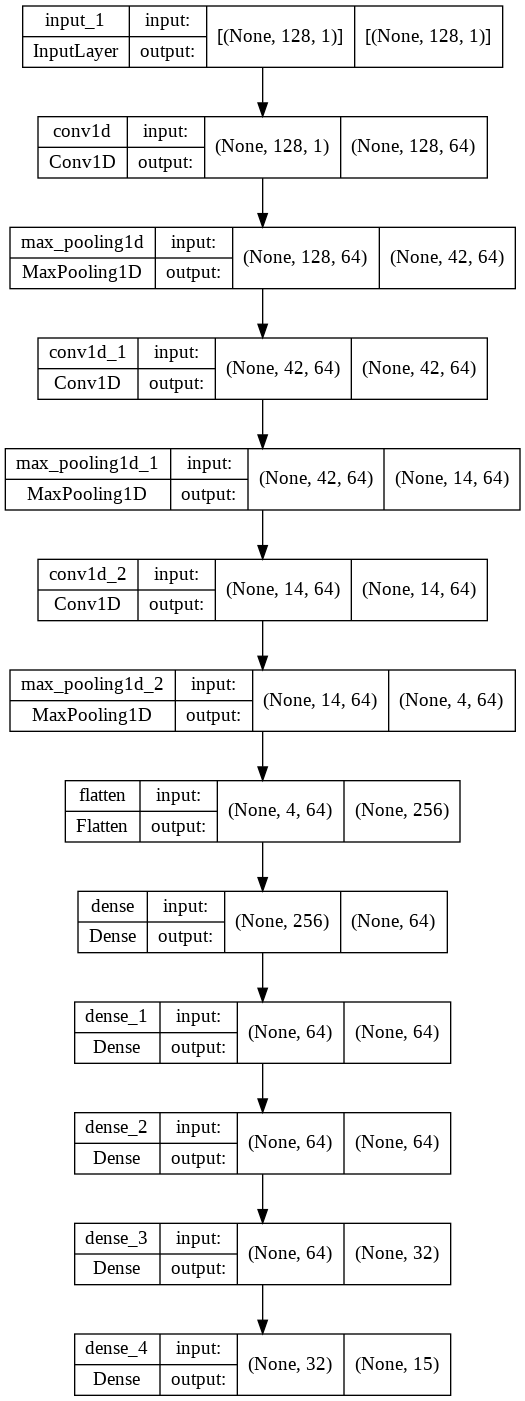

In [62]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Model Compilation**


*   Optimizer = Adam
*   Loss Function = Sparse Categorical Crossentropy
*   Metrics = Accuracy




In [63]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Model Fitting**

In [64]:
history = model.fit(X_train_1d, y_train, epochs=250, validation_data=(X_test_1d,y_test))

Epoch 1/250
4/4 [==============================] - 3s 156ms/step - loss: 3.0255 - accuracy: 0.0583 - val_loss: 2.8338 - val_accuracy: 0.1333
Epoch 2/250
4/4 [==============================] - 0s 11ms/step - loss: 2.7052 - accuracy: 0.1250 - val_loss: 2.6653 - val_accuracy: 0.0667
Epoch 3/250
4/4 [==============================] - 0s 11ms/step - loss: 2.6775 - accuracy: 0.1083 - val_loss: 2.6276 - val_accuracy: 0.1000
Epoch 4/250
4/4 [==============================] - 0s 10ms/step - loss: 2.5934 - accuracy: 0.1250 - val_loss: 2.6603 - val_accuracy: 0.1333
Epoch 5/250
4/4 [==============================] - 0s 12ms/step - loss: 2.5328 - accuracy: 0.1500 - val_loss: 2.6458 - val_accuracy: 0.1333
Epoch 6/250
4/4 [==============================] - 0s 12ms/step - loss: 2.4663 - accuracy: 0.1667 - val_loss: 2.6312 - val_accuracy: 0.1000
Epoch 7/250
4/4 [==============================] - 0s 13ms/step - loss: 2.3939 - accuracy: 0.1917 - val_loss: 2.5905 - val_accuracy: 0.1333
Epoch 8/250
4/4 [==

**Model Evaluation**

In [65]:
model.evaluate(X_test_1d,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 8.0165 - accuracy: 0.3333


[8.016518592834473, 0.3333333432674408]

**Plotting Model Loss and Accuracy**

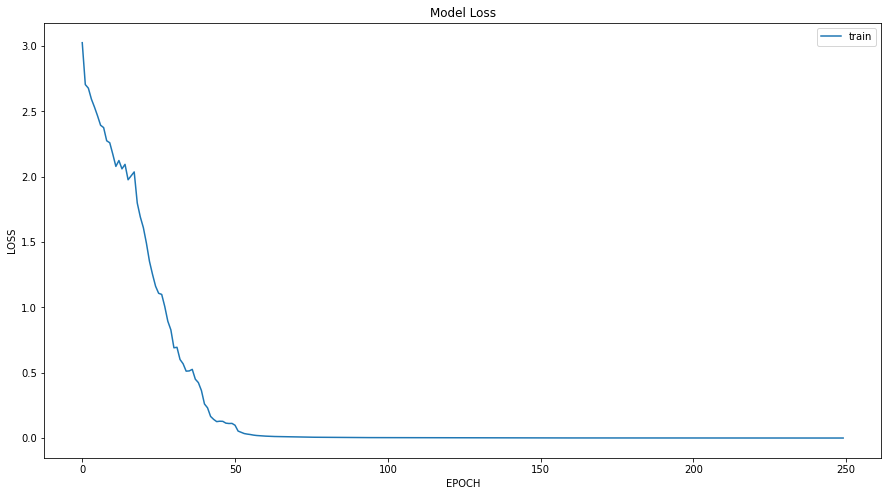

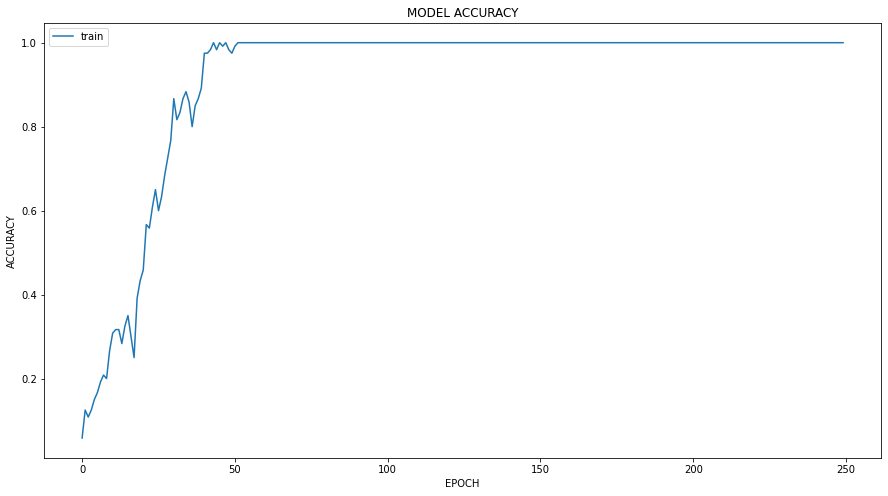

In [66]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('Model Loss')
plt.legend(['train'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train'])
plt.show()

**Checking the Accuracy on Validation Set**

In [67]:
cnn_1d_predict = model.predict(X_test_1d)
cnn_1d_predict = np.argmax(cnn_1d_predict, axis=1)
print("The Accuracy of 1D CNN is :",accuracy_score(cnn_1d_predict,y_test))

The Accuracy of 1D CNN is : 0.3333333333333333


In [68]:
print(classification_report(cnn_1d_predict,y_test,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.50      0.20      0.29         5
          11       0.00      0.00      0.00         0
          12       0.50      0.25      0.33         4
          13       0.50      1.00      0.67         1

    accuracy                           0.33        30
   macro avg       0.33      0.34      0.32        30
weighted avg       0.42      0.33      0.35        30



**Model Testing**

Use of custom recording to test against the model built.

Picking 3 random words from 15 to test.

12. Index = x123

**'بھارت' = Bharat (India)**

2. Index = xx84

**'سو' = So (Sleep)**

3. Index = xx85

**'خود' = Khud (Myself)**

In [69]:
path=["bharat.wav","so.wav","khud.wav"]
word = ['bharat','so','khud']

In [70]:
test_df=pd.DataFrame(list(zip(word,path)),columns=['Word','Path'])

In [71]:
test_df

Word        Path
0  bharat  bharat.wav
1      so      so.wav
2    khud    khud.wav

In [72]:
X_df=pd.DataFrame(test_df['Path'].apply(lambda x: mfcc_features(x)).tolist())

In [73]:
X_df

0          1          2          3          4          5    \
0 -626.747192  75.354279 -39.763008  15.040310 -16.372393  18.608427   
1 -626.612732  47.331394 -24.217834  11.908261 -13.973323   9.625823   
2 -623.571228  71.556961 -30.921532  14.448839 -17.444151  15.075999   

         6         7          8         9    ...       118       119  \
0 -17.413773  8.460178  -7.454381  0.849447  ... -0.781751 -0.210532   
1 -10.186502  4.877966  -6.144906  0.316926  ... -1.053568 -0.430440   
2 -11.978877  9.270804 -11.673677 -2.960443  ... -0.950992 -0.776392   

        120       121       122       123       124       125       126  \
0  0.497856 -0.178552  0.108227 -0.290719  0.637350 -0.362942  0.034155   
1 -0.089951 -0.264556 -0.646423 -0.610966 -0.074608 -0.156551 -0.547317   
2 -0.422833 -0.633455 -0.399665 -0.336365  0.299548 -0.086371 -0.244276   

        127  
0  0.095484  
1  0.376719  
2  0.097072  

[3 rows x 128 columns]

In [74]:
predictions=model.predict(X_df)

In [75]:
predictions=np.argmax(predictions,axis=1)

In [76]:
predictions

array([11,  2,  2])

In [77]:
predictions=encoder.inverse_transform(predictions)

In [78]:
predictions

array(['189', '085', '085'], dtype=object)

In [79]:
dataframe.loc[dataframe.Corpus.isin(predictions)]

Corpus           English   Urdu                        Path
22    085      Khud(Myself)  تعلیم  files/AEFYG1/AEFYG1085.wav
23    085      Khud(Myself)  تعلیم  files/AFFYG1/AFFYG1085.wav
24    085      Khud(Myself)  تعلیم  files/AGMNG1/AGMNG1085.wav
25    085      Khud(Myself)  تعلیم  files/AHMNG1/AHMNG1085.wav
26    085      Khud(Myself)  تعلیم  files/ACMNG2/ACMNG2085.wav
27    085      Khud(Myself)  تعلیم  files/AIMYG2/AIMYG2085.wav
28    085      Khud(Myself)  تعلیم  files/AJMNG2/AJMNG2085.wav
29    085      Khud(Myself)  تعلیم  files/AKMNG2/AKMNG2085.wav
30    085      Khud(Myself)  تعلیم  files/AAMNG1/AAMNG1098.wav
31    085      Khud(Myself)  تعلیم  files/ABMNG1/ABMNG1098.wav
32    085      Khud(Myself)  تعلیم  files/AEFYG1/AEFYG1098.wav
88    189  Maujuda(Current)    سخت  files/AJMNG2/AJMNG2189.wav
89    189  Maujuda(Current)    سخت  files/AKMNG2/AKMNG2189.wav
90    189  Maujuda(Current)    سخت  files/AAMNG1/AAMNG1193.wav
91    189  Maujuda(Current)    سخت  files/ABMNG1/ABMNG1193.wav
92    189  Maujuda(Current)    سخت  files/AEFYG1/AEFYG1193.wav
93    189  Maujuda(Current)    سخت  files/AFFYG1/AFFYG1193.wav
94    189  Maujuda(Current)    سخت  files/AGMNG1/AGMNG1193.wav
95    189  Maujuda(Current)    سخت  files/AHMNG1/AHMNG1193.wav
96    189  Maujuda(Current)    سخت  files/ACMNG2/ACMNG2193.wav
97    189  Maujuda(Current)    سخت  files/AIMYG2/AIMYG2193.wav
98    189  Maujuda(Current)    سخت  files/AJMNG2/AJMNG2193.wav

** Conclusions  **


*   As we can none of the words are classified correctly.
*   The main problem here is that there is very less amount of training and testing data.
*   Best Model is found to be 1D CNN with an accuracy of 33% with 128 MFCC features.
